# Capstone Project: PAK DE (Parkinson Detection)

Dataset yang digunakan adalah 2 dataset yang digabungkan, dimana ada 3 jenis kelas setelah dilakukan penggabungan dataset yaitu `spiral`, `wave`, dan `meander`.


**Source:** [HandPD dataset](https://wwwp.fc.unesp.br/~papa/pub/datasets/Handpd/) dan [Hand Drawings](https://data.mendeley.com/datasets/fd5wd6wmdj/1)

## Install Module

In [1]:
pip install tensorflow

In [2]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.9/722.9 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

## Import Library

In [4]:
# --- Libraries untuk Operasi Dasar dan Sistem File ---
import os  # Untuk berinteraksi dengan sistem operasi, seperti path, direktori
import pathlib  # Untuk bekerja dengan path file dan direktori secara object-oriented (tidak digunakan secara eksplisit di kode yang Anda berikan, tapi umum)
import random  # Untuk menghasilkan angka acak (tidak digunakan secara eksplisit, tapi bisa berguna)
import shutil  # Untuk operasi file tingkat tinggi seperti menyalin dan menghapus folder
import zipfile # Untuk bekerja dengan file ZIP (tidak digunakan secara eksplisit karena Anda menggunakan !unzip)

# --- Libraries untuk Manipulasi Data dan Numerik ---
import numpy as np  # Fundamental package untuk komputasi numerik, terutama array multidimensi
import pandas as pd  # Untuk analisis dan manipulasi data, terutama struktur data seperti DataFrame
from tqdm.notebook import tqdm as tq  # Untuk menampilkan progress bar yang interaktif di notebook Jupyter/Colab

# --- Libraries Spesifik Google Colab ---
# from google.colab import files # Untuk upload/download file di Colab (tidak digunakan di kode terakhir)
from google.colab import drive # Untuk me-mount Google Drive di Colab

# --- Libraries untuk Visualisasi Data ---
# %matplotlib inline # Magic command Jupyter untuk menampilkan plot matplotlib secara inline
import matplotlib.pyplot as plt  # Library utama untuk membuat plot dan visualisasi statis, animasi, dan interaktif
import seaborn as sns  # Library visualisasi data berbasis matplotlib, menyediakan antarmuka tingkat tinggi untuk grafik statistik yang menarik

# --- Libraries untuk Pemrosesan Gambar dan Machine Learning ---
from PIL import Image  # Python Imaging Library (Pillow fork) untuk membuka, memanipulasi, dan menyimpan berbagai format file gambar
from collections import Counter # Untuk menghitung frekuensi item dalam sebuah list (digunakan untuk mengecek channel warna)

# --- TensorFlow dan Keras (untuk Deep Learning) ---
import tensorflow as tf  # Platform open-source end-to-end untuk machine learning
from tensorflow.keras.applications import MobileNetV2  # Model MobileNetV2 yang sudah terlatih (pre-trained) untuk transfer learning
from tensorflow.keras import layers, models, callbacks, optimizers  # Komponen-komponen untuk membangun dan melatih model Keras:
                                                                  # layers: Blok bangunan model (Dense, Dropout, Conv2D, dll.)
                                                                  # models: API untuk membuat model (Sequential, Functional)
                                                                  # callbacks: Fungsi yang dipanggil selama pelatihan (EarlyStopping, ReduceLROnPlateau)
                                                                  # optimizers: Algoritma untuk mengoptimalkan model (Adam, SGD)
from tensorflow.keras.regularizers import l2  # Untuk menerapkan regularisasi L2 (weight decay) pada bobot layer
from tensorflow.keras.preprocessing import image # Utilitas untuk preprocessing gambar sebelum dimasukkan ke model Keras (misalnya, load_img, img_to_array)

# --- Scikit-learn (untuk utilitas Machine Learning) ---
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi set latih dan tes (atau validasi)
from sklearn.utils import class_weight  # Untuk menghitung bobot kelas guna menangani dataset yang tidak seimbang
from sklearn.metrics import confusion_matrix, classification_report  # Untuk mengevaluasi performa model klasifikasi

# --- MLflow (untuk Manajemen Eksperimen Machine Learning) ---
import mlflow  # Platform open-source untuk mengelola siklus hidup machine learning, termasuk pelacakan eksperimen
import mlflow.tensorflow  # Modul MLflow untuk integrasi dengan TensorFlow/Keras

# --- Lain-lain ---
import tempfile  # Untuk membuat file dan direktori sementara

# --- Mengabaikan Peringatan untuk output yang lebih bersih ---
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Tahap 1: Konfigurasi Dasar dan Pemuatan Data Awal

In [5]:
# Mount Google Drive (hanya jika menggunakan Colab)
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Konfigurasi Dasar

In [6]:
# Konfigurasi Dasar
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42
AUTOTUNE = tf.data.AUTOTUNE

### Data Loading

In [7]:
# Path ke folder dataset di Google Drive
drive_path = '/content/drive/MyDrive/'
project_folder = 'parkinson' # Nama folder proyek di Drive
dataset_name_zip = 'parkinson_dataset.zip' # Nama file zip
extracted_dataset_folder_name = 'parkinson_dataset' # Nama folder setelah diekstrak

dataset_base_path = os.path.join(drive_path, project_folder)
zip_file_path = os.path.join(dataset_base_path, dataset_name_zip)
dataset_dir = os.path.join(dataset_base_path, extracted_dataset_folder_name) # Path ke folder dataset yang sudah diekstrak
base_path_split = os.path.join(dataset_base_path, 'split_data') # Path untuk menyimpan data yang sudah di-split

In [8]:
# Direktori tujuan untuk mengesktrak isi zip
if not os.path.exists(dataset_dir):
    print(f"Mengekstrak: '{zip_file_path}' ke '{dataset_base_path}'")
    if os.path.exists(zip_file_path):
        # Perintah unzip untuk Colab
        !unzip -q "{zip_file_path}" -d "{dataset_base_path}"
        print(f"File '{dataset_name_zip}' berhasil diekstrak ke: {dataset_base_path}")
    else:
        print(f"File ZIP '{dataset_name_zip}' tidak ditemukan di: {zip_file_path}")
else:
    print(f"Folder dataset '{dataset_dir}' sudah ada.")

Folder dataset '/content/drive/MyDrive/parkinson/parkinson_dataset' sudah ada.


### 1.1. Mengumpulkan Path Gambar dan Label Awal untuk EDA

In [9]:
all_file_paths_eda = []
all_labels_initial_eda = []
all_labels_main_eda = []
image_modes_eda = []
image_sizes_eda = {}

sub_folders = ['meander', 'spiral', 'wave']
categories = ['healthy', 'parkinson']

for sub_folder in sub_folders:
    image_sizes_eda[sub_folder] = {'healthy': [], 'parkinson': []}
    for category in categories:
        folder_path = os.path.join(dataset_dir, sub_folder, category)
        if os.path.exists(folder_path) and os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')) and not filename.startswith('.'): # Hindari file tersembunyi
                    img_path = os.path.join(folder_path, filename)
                    all_file_paths_eda.append(img_path)
                    all_labels_initial_eda.append(f"{category} ({sub_folder})")
                    all_labels_main_eda.append(category)
                    try:
                        with Image.open(img_path) as img:
                            image_modes_eda.append(img.mode)
                            image_sizes_eda[sub_folder][category].append(img.size)
                    except Exception as e:
                        print(f"Gagal membaca info gambar {img_path}: {e}")
        else:
            print(f"Folder tidak ditemukan atau bukan direktori: {folder_path}")

if not all_file_paths_eda:
    raise ValueError("Tidak ada file gambar yang ditemukan untuk EDA. Periksa path dataset_dir dan struktur folder.")

df_eda = pd.DataFrame({
    "path": all_file_paths_eda,
    "labels_initial": all_labels_initial_eda,
    "labels_main": all_labels_main_eda
})
print(f"Total gambar ditemukan untuk EDA: {len(df_eda)}")

Total gambar ditemukan untuk EDA: 940


## Tahap 2: Exploratory Data Analysis (EDA)

Pada tahapan ini dilakukan untuk memahami isi dan kualitas dataset sebelum diproses.

### EDA 2.1. Sampel Gambar untuk Semua Kelas dan Jenis

Untuk memahami seperti apa variasi visual dari tiap kelas  (healthy vs parkinson) dalam jenis gambar (spiral, wave, meander).

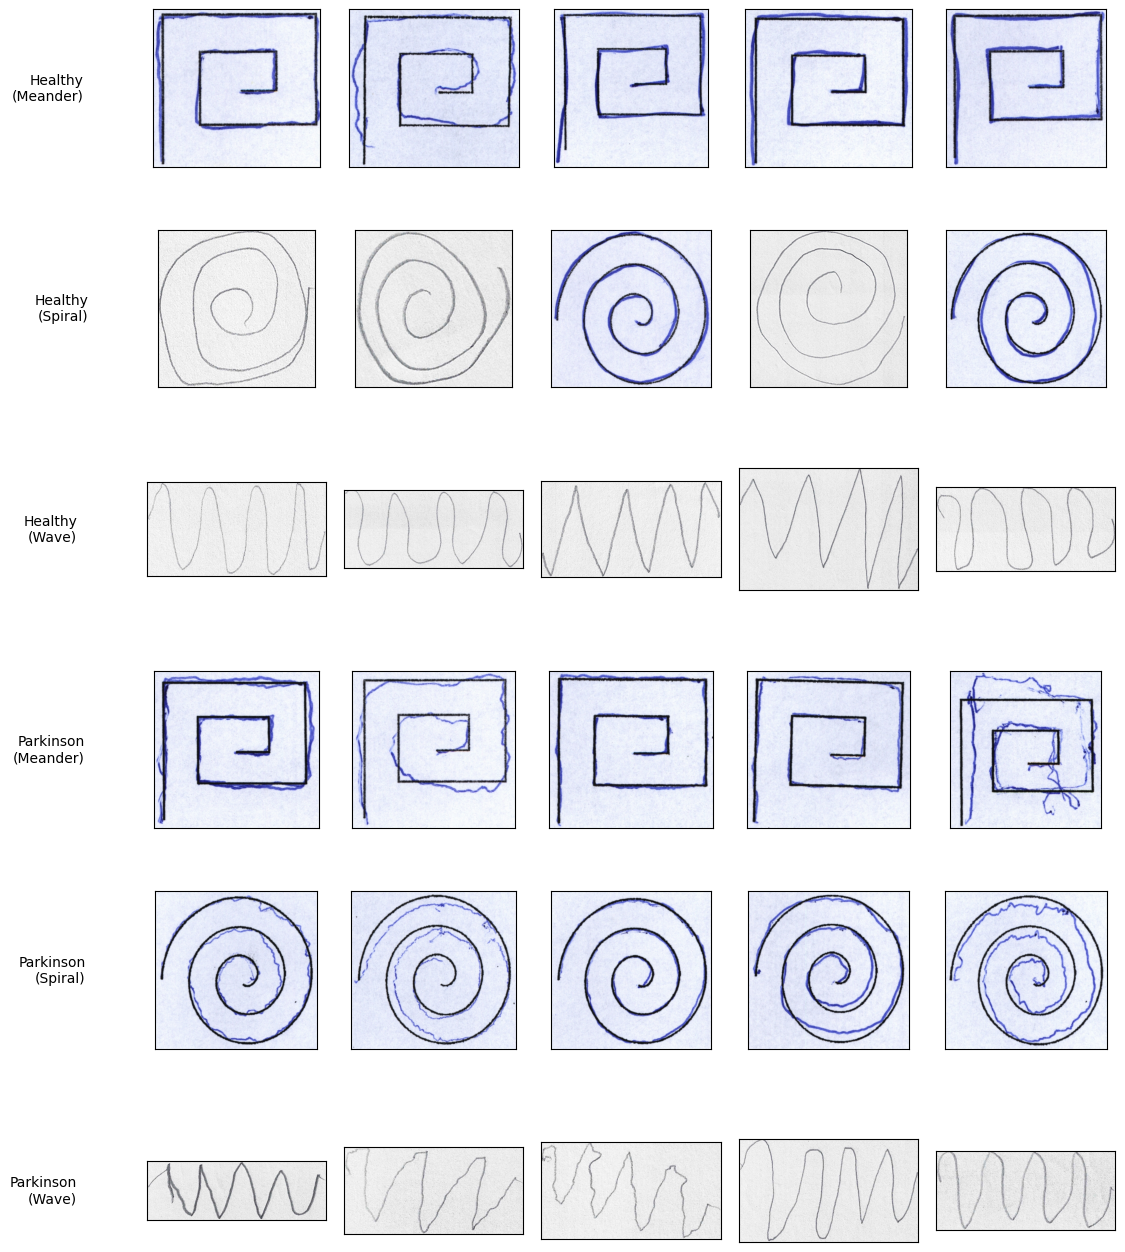

In [10]:
num_samples_to_display = 5
all_images_by_category_plot = {}
for sub_folder in sub_folders:
    for category in categories:
        folder_path = os.path.join(dataset_dir, sub_folder, category)
        if os.path.exists(folder_path) and os.path.isdir(folder_path):
            image_files = [
                f for f in os.listdir(folder_path)
                if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))
            ]
            if image_files:
                key_name = f"{category.capitalize()}\n({sub_folder.capitalize()})"
                all_images_by_category_plot[key_name] = [os.path.join(folder_path, fname) for fname in image_files]

sorted_categories_plot = sorted(all_images_by_category_plot.keys())
num_categories_to_plot = len(sorted_categories_plot)

if num_categories_to_plot > 0:
    fig, axs = plt.subplots(num_categories_to_plot, num_samples_to_display,
                            figsize=(num_samples_to_display * 2.5, num_categories_to_plot * 2.5))
    if num_categories_to_plot == 1: axs = np.array([axs])
    if num_samples_to_display == 1 and num_categories_to_plot > 1: axs = axs.reshape(-1, 1)
    elif num_samples_to_display == 1 and num_categories_to_plot == 1: axs = np.array([[axs]])

    for i, category_name in enumerate(sorted_categories_plot):
        image_paths_list = all_images_by_category_plot[category_name]
        if image_paths_list:
            selected_image_paths = np.random.choice(image_paths_list,
                                                    min(num_samples_to_display, len(image_paths_list)),
                                                    replace=False)
            if num_samples_to_display > 0 :
                axs[i, 0].set_ylabel(category_name, rotation=0, size='medium', labelpad=50, ha='right', va='center')
            for j in range(num_samples_to_display):
                if j < len(selected_image_paths):
                    img_path_plot = selected_image_paths[j]
                    try:
                        img_plot = Image.open(img_path_plot).convert('RGB')
                        axs[i, j].imshow(img_plot)
                    except Exception: axs[i, j].set_title("Error", fontsize=8)
                else: axs[i,j].text(0.5, 0.5, 'N/A', ha='center', va='center', fontsize=10)
                axs[i,j].set_xticks([]); axs[i,j].set_yticks([]); axs[i,j].set_xlabel('')
        else:
            if num_samples_to_display > 0: axs[i, 0].set_ylabel(category_name, rotation=0, size='medium', labelpad=50, ha='right', va='center')
            for j in range(num_samples_to_display): axs[i,j].text(0.5, 0.5, 'No Images', ha='center', va='center', fontsize=10); axs[i,j].set_xticks([]); axs[i,j].set_yticks([]); axs[i,j].set_xlabel('')
    plt.subplots_adjust(hspace=0.4, wspace=0.1, top=0.95); plt.show()
else:
    print("Tidak ada data gambar untuk sampel EDA.")

### EDA 2.2. Distribusi Gambar per Kelas Utama (Healthy vs Parkinson)

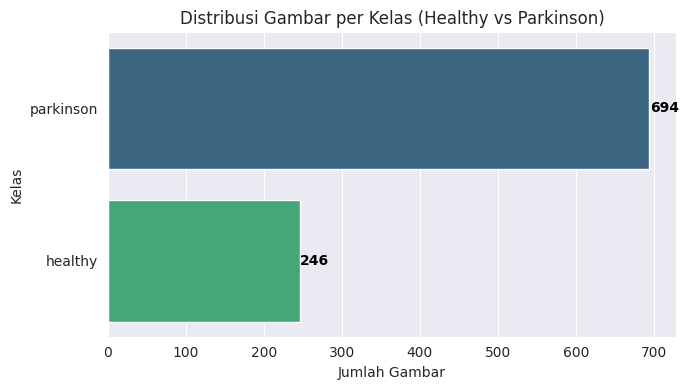


Jumlah Gambar per Kelas (Healthy vs Parkinson):
 labels_main
parkinson    694
healthy      246
Name: count, dtype: int64


In [11]:
label_counts_main_eda = df_eda['labels_main'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(7, 4))
sns.set_style("darkgrid")
ax = sns.countplot(y='labels_main', data=df_eda, order=label_counts_main_eda.index, palette="viridis")
plt.title('Distribusi Gambar per Kelas (Healthy vs Parkinson)')
plt.xlabel('Jumlah Gambar'); plt.ylabel('Kelas')
for i, v in enumerate(label_counts_main_eda): ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')
plt.tight_layout(); plt.show()
print("\nJumlah Gambar per Kelas (Healthy vs Parkinson):\n", label_counts_main_eda)

### EDA 2.3. Distribusi Gambar per Kelas dan Jenis

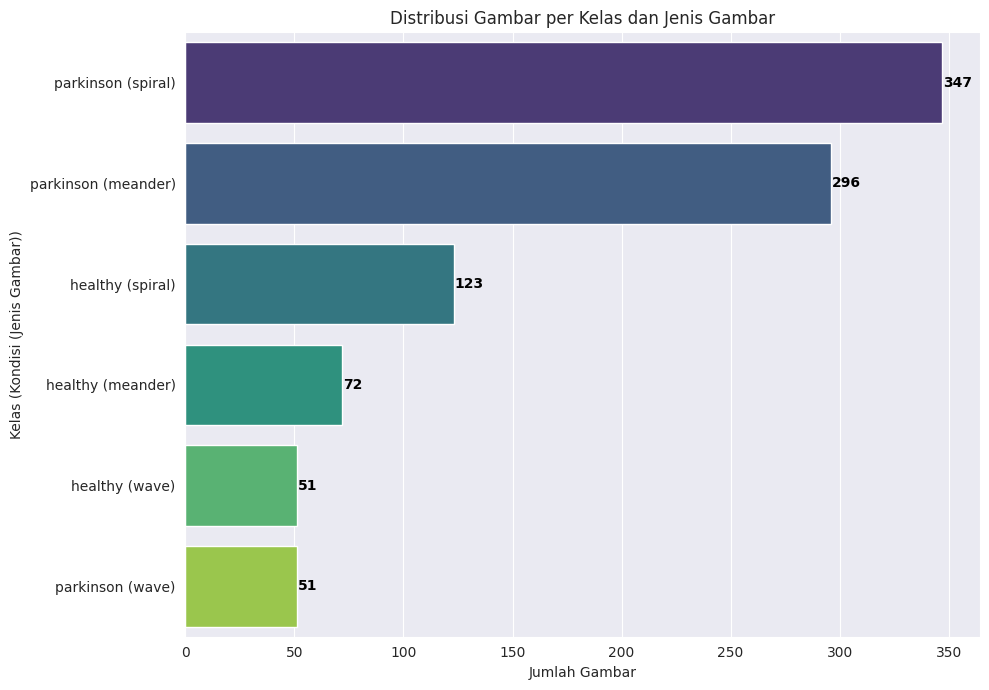


Jumlah Gambar per Kelas dan Jenis:
 labels_initial
parkinson (spiral)     347
parkinson (meander)    296
healthy (spiral)       123
healthy (meander)       72
healthy (wave)          51
parkinson (wave)        51
Name: count, dtype: int64


In [12]:
label_counts_detailed_eda = df_eda['labels_initial'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 7))
n_labels_detailed_eda = len(label_counts_detailed_eda)
if n_labels_detailed_eda > 0:
    palette_detailed_eda = sns.color_palette("viridis", n_colors=n_labels_detailed_eda)
    sns.set_style("darkgrid")
    ax = sns.countplot(y='labels_initial', data=df_eda, order=label_counts_detailed_eda.index, palette=palette_detailed_eda)
    plt.title('Distribusi Gambar per Kelas dan Jenis Gambar')
    plt.xlabel('Jumlah Gambar'); plt.ylabel('Kelas (Kondisi (Jenis Gambar))')
    for i, v in enumerate(label_counts_detailed_eda): ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')
    plt.tight_layout(); plt.show()
    print("\nJumlah Gambar per Kelas dan Jenis:\n", label_counts_detailed_eda)
else:
    print("Tidak ada label_initial di df_eda.")

### EDA 2.4. Pengecekan Ukuran Gambar

In [13]:
for sub_folder_key, categories_data in image_sizes_eda.items():
    for category_key, sizes_list in categories_data.items():
        if sizes_list:
            unique_sizes = set(sizes_list)
            print(f"Ukuran gambar unik untuk ('{sub_folder_key}', '{category_key}'): {len(unique_sizes)}")
            if len(unique_sizes) < 10: print(f"   Contoh ukuran: {list(unique_sizes)[:5]}")
        else:
            print(f"Tidak ada ukuran gambar untuk ('{sub_folder_key}', '{category_key}')")

Ukuran gambar unik untuk ('meander', 'healthy'): 70
Ukuran gambar unik untuk ('meander', 'parkinson'): 280
Ukuran gambar unik untuk ('spiral', 'healthy'): 72
Ukuran gambar unik untuk ('spiral', 'parkinson'): 256
Ukuran gambar unik untuk ('wave', 'healthy'): 31
Ukuran gambar unik untuk ('wave', 'parkinson'): 43


### 2.5. Pengecekan Format Warna

In [14]:
mode_counts_original = Counter(image_modes_eda)
print("Distribusi mode gambar asli dalam dataset:", mode_counts_original)
if 'RGBA' in mode_counts_original or 'P' in mode_counts_original or 'L' in mode_counts_original:
    print("Catatan: Ada gambar dengan mode selain RGB. TensorFlow akan mengonversinya ke RGB jika color_mode='rgb'.")

Distribusi mode gambar asli dalam dataset: Counter({'RGB': 931, 'RGBA': 9})
Catatan: Ada gambar dengan mode selain RGB. TensorFlow akan mengonversinya ke RGB jika color_mode='rgb'.


## Tahap 3: Preprocessing Data untuk Model

### 3.1. Pembagian Data (Menggunakan DataFrame dari EDA)

In [15]:
labels_for_split = df_eda['labels_main']
main_df, test_df = train_test_split(df_eda, test_size=0.1, stratify=labels_for_split, random_state=SEED)
train_labels_for_stratify_val = main_df['labels_main']
train_df, val_df = train_test_split(main_df, test_size=0.2, stratify=train_labels_for_stratify_val, random_state=SEED)
print(f"Data latih (df): {len(train_df)}, Validasi (df): {len(val_df)}, Tes (df): {len(test_df)}")

Data latih (df): 676, Validasi (df): 170, Tes (df): 94


### 3.2. Menyalin Gambar ke Folder Split

In [16]:
if os.path.exists(base_path_split):
    print(f"Menghapus folder split_data lama: {base_path_split}")
    shutil.rmtree(base_path_split)
os.makedirs(base_path_split, exist_ok=True)

def copy_images_for_tf_dataset(df_to_copy, split_name_arg, base_path_split_arg): # Ganti nama parameter df
    print(f"Menyalin gambar untuk set {split_name_arg}...")
    for _, row in df_to_copy.iterrows():
        label_folder = row['labels_main']
        dst_dir = os.path.join(base_path_split_arg, split_name_arg, label_folder)
        os.makedirs(dst_dir, exist_ok=True)
        try:
            shutil.copy(row['path'], os.path.join(dst_dir, os.path.basename(row['path'])))
        except Exception as e:
            print(f"Error menyalin {row['path']} ke {dst_dir}: {e}")
    print(f"Selesai menyalin untuk set {split_name_arg}.")

copy_images_for_tf_dataset(train_df, "train", base_path_split)
copy_images_for_tf_dataset(val_df, "val", base_path_split)
copy_images_for_tf_dataset(test_df, "test", base_path_split)

Menghapus folder split_data lama: /content/drive/MyDrive/parkinson/split_data
Menyalin gambar untuk set train...
Selesai menyalin untuk set train.
Menyalin gambar untuk set val...
Selesai menyalin untuk set val.
Menyalin gambar untuk set test...
Selesai menyalin untuk set test.


### 3.3. Load Dataset dengan `tf.data.image_dataset_from_directory`

In [17]:
train_path = os.path.join(base_path_split, 'train')
val_path = os.path.join(base_path_split, 'val')
test_path = os.path.join(base_path_split, 'test')

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path, labels='inferred', label_mode='int', image_size=IMG_SIZE,
    batch_size=BATCH_SIZE, seed=SEED, shuffle=True, color_mode='rgb'
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path, labels='inferred', label_mode='int', image_size=IMG_SIZE,
    batch_size=BATCH_SIZE, seed=SEED, shuffle=False, color_mode='rgb'
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path, labels='inferred', label_mode='int', image_size=IMG_SIZE,
    batch_size=BATCH_SIZE, seed=SEED, shuffle=False, color_mode='rgb'
)
class_names_from_tf = train_ds.class_names
print(f"Nama kelas ditemukan oleh TensorFlow: {class_names_from_tf}")

Found 676 files belonging to 2 classes.
Found 170 files belonging to 2 classes.
Found 94 files belonging to 2 classes.
Nama kelas ditemukan oleh TensorFlow: ['healthy', 'parkinson']


### 3.4. Hitung Class Weight

In [18]:
train_labels_for_weights = np.concatenate([y for x, y in train_ds], axis=0)
class_weights_values = class_weight.compute_class_weight(
    class_weight='balanced', classes=np.unique(train_labels_for_weights), y=train_labels_for_weights
)
class_map = {name: i for i, name in enumerate(class_names_from_tf)}
class_weight_dict = {
    class_map.get('healthy', 0): class_weights_values[class_map.get('healthy', 0)],
    class_map.get('parkinson', 1): class_weights_values[class_map.get('parkinson', 1)]
}
print(f"Class names dari train_ds: {class_names_from_tf} -> Mapping: {class_map}")
print("Calculated Class Weights:", class_weight_dict)

Class names dari train_ds: ['healthy', 'parkinson'] -> Mapping: {'healthy': 0, 'parkinson': 1}
Calculated Class Weights: {0: np.float64(1.9096045197740112), 1: np.float64(0.6773547094188377)}


### 3.5. Augmentasi Data dan Preprocessing Pipeline untuk Model

In [19]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip('horizontal'),
        tf.keras.layers.RandomRotation(0.15),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.RandomContrast(0.1)
    ], name="data_augmentation"
)

def apply_augmentation(image, label):
    image = tf.cast(image, tf.float32)
    image = data_augmentation(image, training=True)
    return image, label

def apply_preprocess_for_mobilenetv2(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    return image, label

train_ds_final = train_ds.map(apply_augmentation, num_parallel_calls=AUTOTUNE)
train_ds_final = train_ds_final.map(apply_preprocess_for_mobilenetv2, num_parallel_calls=AUTOTUNE)
val_ds_final = val_ds.map(apply_preprocess_for_mobilenetv2, num_parallel_calls=AUTOTUNE)
test_ds_final = test_ds.map(apply_preprocess_for_mobilenetv2, num_parallel_calls=AUTOTUNE)

train_ds_final = train_ds_final.prefetch(buffer_size=AUTOTUNE)
val_ds_final = val_ds_final.prefetch(buffer_size=AUTOTUNE)
test_ds_final = test_ds_final.prefetch(buffer_size=AUTOTUNE)

#### Verifikasi Pipeline

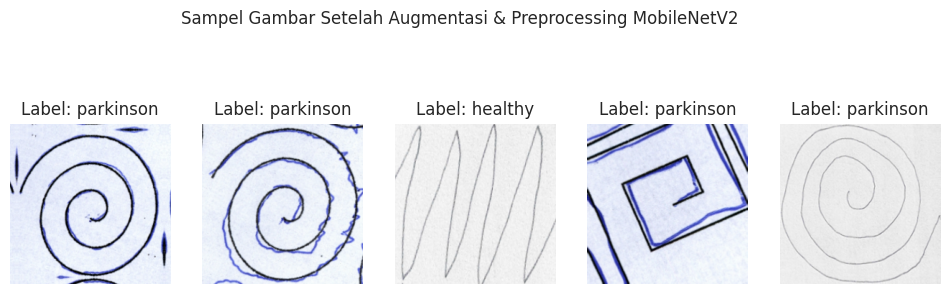

In [20]:
for images, labels in train_ds_final.take(1):
    plt.figure(figsize=(12, 4))
    for i in range(min(5, BATCH_SIZE)):
        ax = plt.subplot(1, 5, i + 1)
        img_display = (images[i].numpy() + 1.0) / 2.0
        img_display = np.clip(img_display, 0, 1)
        plt.imshow(img_display)
        plt.title(f'Label: {class_names_from_tf[labels[i].numpy()]}')
        plt.axis('off')
    plt.suptitle("Sampel Gambar Setelah Augmentasi & Preprocessing MobileNetV2")
    plt.show()
    break

## Tahap 4: Pemodelan dan Pelatihan

In [21]:
param_sets = [
    {
        "run_name": "LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore",
        "initial_lr": 5e-4, "dense_units": 64, "dropout_1": 0.4, "dropout_2": 0.3, "l2_reg": 0.002,
        "epochs": 60, "patience_early_stop": 15, "patience_reduce_lr": 5
    },
] # Anda bisa tambahkan set lain di sini
# Pastikan direktori MLflow ada jika logging lokal (Colab biasanya sudah handle ini)
os.makedirs("./mlruns", exist_ok=True)

best_run_id_for_analysis = None
best_run_accuracy = 0.0
model_for_analysis = None # Akan menyimpan model terbaik

for params in param_sets:
    # Tentukan nama eksperimen di MLflow
    # (Anda bisa menggunakan nama yang sama untuk semua run dalam satu seri eksperimen)
    mlflow.set_experiment("Parkinson_Detection_Capstone_Final_Runs")

    with mlflow.start_run(run_name=params["run_name"]) as run:
        current_run_id = run.info.run_id
        print(f"\n--- Memulai Run MLflow: {params['run_name']} (ID: {current_run_id}) ---")

        # Logging Parameter ke MLflow
        mlflow.log_params(params)
        mlflow.log_param("trainable_base", False)
        mlflow.log_param("batch_size", BATCH_SIZE)
        # Anda bisa log parameter augmentasi jika divariasikan antar run

        # Bangun Model
        base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')
        base_model.trainable = False # Fokus pada feature extraction

        # Definisikan model
        # (Pastikan params.get("dropout_2", 0.0) digunakan jika dropout_2 opsional)
        model = models.Sequential([
            base_model,
            layers.GlobalAveragePooling2D(),
            layers.Dropout(params["dropout_1"]),
            layers.Dense(params["dense_units"], activation='relu', kernel_regularizer=l2(params["l2_reg"])),
            layers.BatchNormalization(),
            layers.Dropout(params.get("dropout_2", 0.0)), # Default 0.0 jika tidak ada dropout_2
            layers.Dense(1, activation='sigmoid')
        ], name=f"model_{params['run_name']}")

        # Kompilasi Model
        model.compile(optimizer=optimizers.Adam(learning_rate=params["initial_lr"]),
                      loss='binary_crossentropy',
                      metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

        if params["run_name"] == param_sets[0]["run_name"]: # Hanya print summary untuk run pertama
            model.summary(print_fn=lambda x: print(x))


        print(f"--- Melatih model dengan konfigurasi: {params['run_name']} ---")
        # Callbacks
        early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=params["patience_early_stop"], restore_best_weights=True, verbose=1)
        reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=params["patience_reduce_lr"], min_lr=1e-7, verbose=1)

        # Pelatihan Model
        history = model.fit(
            train_ds_final,
            epochs=params["epochs"],
            validation_data=val_ds_final,
            class_weight=class_weight_dict, # Pastikan class_weight_dict sudah ada
            callbacks=[early_stop, reduce_lr],
            verbose=1
        )

        # Logging metrik per epoch ke MLflow
        actual_epochs_trained = len(history.history['loss'])
        mlflow.log_metric("actual_epochs_trained", actual_epochs_trained)
        for epoch_idx in range(actual_epochs_trained):
            for metric_name in history.history.keys():
                 # Hindari error jika metrik tidak ada di history (meskipun seharusnya ada)
                 mlflow.log_metric(f"{metric_name}_epoch", history.history.get(metric_name, [np.nan]*actual_epochs_trained)[epoch_idx], step=epoch_idx + 1)

        # Plot training history
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        fig.suptitle(f'Training History - {params["run_name"]}', fontsize=16)

        axes[0].plot(history.history['accuracy'], label='Train Acc')
        axes[0].plot(history.history['val_accuracy'], label='Val Acc')
        axes[0].set_title('Accuracy'); axes[0].set_xlabel('Epoch'); axes[0].set_ylabel('Accuracy')
        axes[0].legend(); axes[0].grid(True)

        axes[1].plot(history.history['loss'], label='Train Loss')
        axes[1].plot(history.history['val_loss'], label='Val Loss')
        axes[1].set_title('Loss'); axes[1].set_xlabel('Epoch'); axes[1].set_ylabel('Loss')
        axes[1].legend(); axes[1].grid(True)

        plot_metrics = ['precision', 'recall']
        for metric_to_plot in plot_metrics:
            if metric_to_plot in history.history and f'val_{metric_to_plot}' in history.history:
                axes[2].plot(history.history.get(metric_to_plot, []), label=f'Train {metric_to_plot.capitalize()}')
                axes[2].plot(history.history.get(f'val_{metric_to_plot}', []), label=f'Val {metric_to_plot.capitalize()}')
        axes[2].set_title('Precision & Recall'); axes[2].set_xlabel('Epoch'); axes[2].set_ylabel('Score')
        if any(m in history.history for m in plot_metrics): axes[2].legend();
        axes[2].grid(True)

        temp_fig_path = tempfile.mktemp(suffix=f"_{current_run_id}_history.png")
        plt.tight_layout(rect=[0, 0, 1, 0.95]); plt.savefig(temp_fig_path); plt.close(fig)
        mlflow.log_artifact(temp_fig_path, artifact_path="plots_per_run")

        # Evaluasi pada Test Set
        print(f"--- Mengevaluasi {params['run_name']} pada Test Set ---")
        results = model.evaluate(test_ds_final, verbose=0)
        test_metrics_names = model.metrics_names
        test_metrics_values = results

        current_test_accuracy = 0.0
        print(f"Test Metrics Names: {test_metrics_names}")
        print(f"Test Metrics Values: {test_metrics_values}")
        for name, val in zip(test_metrics_names, test_metrics_values):
             mlflow.log_metric(f"test_{name}_final", val)
             if name == 'accuracy': # atau nama metrik akurasi Anda
                 current_test_accuracy = val

        # Simpan model terbaik untuk analisis kesalahan nanti
        if current_test_accuracy > best_run_accuracy:
            best_run_accuracy = current_test_accuracy
            best_run_id_for_analysis = current_run_id
            model_for_analysis = model # Simpan objek modelnya
            print(f"Model terbaik baru ditemukan! Run: {params['run_name']}, Akurasi Tes: {best_run_accuracy:.4f}")


        # Prediksi untuk Classification Report dan Confusion Matrix
        y_true_list, y_pred_probs_list = [], []
        for img_batch, label_batch in test_ds_final: # Pastikan ini test_ds_final
            preds = model.predict(img_batch, verbose=0)
            y_true_list.extend(label_batch.numpy()); y_pred_probs_list.extend(preds.flatten())
        y_pred_final = (np.array(y_pred_probs_list) > 0.5).astype("int32")

        # Confusion Matrix
        cm = confusion_matrix(y_true_list, y_pred_final)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names_from_tf, yticklabels=class_names_from_tf)
        plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title(f"CM - {params['run_name']}")
        temp_cm_path = tempfile.mktemp(suffix=f"_{current_run_id}_cm.png")
        plt.savefig(temp_cm_path); plt.close()
        mlflow.log_artifact(temp_cm_path, artifact_path="plots_per_run")

        # Classification Report
        report_str = classification_report(y_true_list, y_pred_final, target_names=class_names_from_tf)
        report_dict = classification_report(y_true_list, y_pred_final, target_names=class_names_from_tf, output_dict=True)
        print(report_str)
        # Logging metrik dari classification report ke MLflow
        for class_label_report, metrics_val_report in report_dict.items():
            if isinstance(metrics_val_report, dict): # Untuk 'healthy', 'parkinson', 'macro avg', 'weighted avg'
                for metric_label_report, value_report in metrics_val_report.items():
                    mlflow.log_metric(f"test_{class_label_report.replace(' ', '_')}_{metric_label_report.replace('-', '_')}", value_report)
            elif class_label_report != 'support': # Untuk 'accuracy'
                 mlflow.log_metric(f"test_{class_label_report.replace(' ', '_')}", metrics_val_report)

        temp_report_path = tempfile.mktemp(suffix=f"_{current_run_id}_report.txt")
        with open(temp_report_path, "w") as f: f.write(report_str)
        mlflow.log_artifact(temp_report_path)

        # Logging Model Keras ke MLflow
        mlflow.tensorflow.log_model(model, artifact_path="model")
        print(f"Run ID {current_run_id} untuk {params['run_name']} selesai di-log ke: {run.info.artifact_uri}")
        print(f"--- Selesai Run: {params['run_name']} --- \n")


2025/06/01 03:25:31 INFO mlflow.tracking.fluent: Experiment with name 'Parkinson_Detection_Capstone_Final_Runs' does not exist. Creating a new experiment.



--- Memulai Run MLflow: LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore (ID: ddc156f00e5e4963a61c6fb58dabf5bd) ---


Model: "model_LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        81,984 │
├────────────

2025/06/01 03:40:55 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


              precision    recall  f1-score   support

     healthy       0.85      0.68      0.76        25
   parkinson       0.89      0.96      0.92        69

    accuracy                           0.88        94
   macro avg       0.87      0.82      0.84        94
weighted avg       0.88      0.88      0.88        94



2025/06/01 03:41:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID ddc156f00e5e4963a61c6fb58dabf5bd untuk LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore selesai di-log ke: file:///content/mlruns/581317175548580792/ddc156f00e5e4963a61c6fb58dabf5bd/artifacts
--- Selesai Run: LR_5e-4_Dense64_DO_0.4_0.3_L2_0.002_P15_AugMore --- 


Model terbaik dari semua run memiliki akurasi tes: 0.0000 (Run ID: None)


In [37]:
EXPERIMENT_NAME = "Parkinson_Detection_Capstone_Final_Runs" # Pastikan nama eksperimen sama

try:
    experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
    if experiment is None:
        print(f"Eksperimen '{EXPERIMENT_NAME}' tidak ditemukan.")
        BEST_RUN_ID_FROM_MLFLOW = None # Variabel baru untuk ID dari MLflow
    else:
        experiment_id = experiment.experiment_id
        print(f"Experiment ID untuk '{EXPERIMENT_NAME}': {experiment_id}")

        # Nama metrik untuk akurasi tes (pastikan ini benar sesuai log MLflow Anda)
        METRIC_TO_SORT_BY = 'metrics.test_accuracy' # atau metrics.test_accuracy atau nama lain

        all_runs_df = mlflow.search_runs(experiment_ids=[experiment_id])

        if not all_runs_df.empty:
            print(f"\nKolom yang tersedia dari MLflow: {all_runs_df.columns.tolist()}")

            if METRIC_TO_SORT_BY in all_runs_df.columns:
                all_runs_with_metric = all_runs_df.dropna(subset=[METRIC_TO_SORT_BY])
                if not all_runs_with_metric.empty:
                    all_runs_sorted_df = all_runs_with_metric.sort_values(by=METRIC_TO_SORT_BY, ascending=False)
                else:
                    print(f"Tidak ada run dengan metrik '{METRIC_TO_SORT_BY}' yang valid.")
                    all_runs_sorted_df = all_runs_df # Tampilkan semua jika tidak ada yang valid
            else:
                print(f"Peringatan: Metrik '{METRIC_TO_SORT_BY}' tidak ada. Menggunakan urutan default.")
                all_runs_sorted_df = all_runs_df

            print("\n--- Ringkasan Beberapa Run Terbaik dari MLflow ---")
            display_cols = [col for col in ['run_id', 'tags.mlflow.runName', METRIC_TO_SORT_BY, 'params.initial_lr', 'params.dense_units'] if col in all_runs_sorted_df.columns]
            print(all_runs_sorted_df[display_cols].head())

            if not all_runs_sorted_df.empty and METRIC_TO_SORT_BY in all_runs_sorted_df.columns:
                best_run_overall_data = all_runs_sorted_df.iloc[0]
                BEST_RUN_ID_FROM_MLFLOW = best_run_overall_data['run_id'] # Ini ID yang kita cari
                best_run_name_overall = best_run_overall_data['tags.mlflow.runName']
                best_test_accuracy_overall = best_run_overall_data[METRIC_TO_SORT_BY]

                print(f"\n--- Model TERBAIK dari SEMUA Eksperimen (Menurut MLflow) ---")
                print(f"Run Name: {best_run_name_overall}")
                print(f"Run ID: {BEST_RUN_ID_FROM_MLFLOW}")
                print(f"Test Accuracy: {best_test_accuracy_overall:.4f}")
            else:
                print("Tidak bisa menentukan model terbaik dari MLflow berdasarkan metrik yang diberikan.")
                BEST_RUN_ID_FROM_MLFLOW = None
        else:
            print(f"Tidak ada run di eksperimen '{EXPERIMENT_NAME}'.")
            BEST_RUN_ID_FROM_MLFLOW = None
except Exception as e:
    print(f"Error MLflow: {e}")
    BEST_RUN_ID_FROM_MLFLOW = None

# Sekarang BEST_RUN_ID_FROM_MLFLOW berisi ID dari run terbaik yang tercatat di MLflow.
# Anda akan menggunakan ID ini untuk memuat modelnya di Tahap Analisis Kesalahan.
print(f"\nRun ID yang akan digunakan untuk memuat model terbaik di Analisis Kesalahan: {BEST_RUN_ID_FROM_MLFLOW}")


Experiment ID untuk 'Parkinson_Detection_Capstone_Final_Runs': 581317175548580792

Kolom yang tersedia dari MLflow: ['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time', 'end_time', 'metrics.learning_rate_epoch', 'metrics.test_parkinson_recall', 'metrics.test_parkinson_support', 'metrics.val_loss_epoch', 'metrics.test_healthy_precision', 'metrics.test_macro_avg_f1_score', 'metrics.loss_epoch', 'metrics.precision_epoch', 'metrics.test_loss_final', 'metrics.test_parkinson_precision', 'metrics.test_weighted_avg_recall', 'metrics.test_healthy_support', 'metrics.test_weighted_avg_precision', 'metrics.test_macro_avg_precision', 'metrics.test_healthy_recall', 'metrics.test_macro_avg_recall', 'metrics.recall_epoch', 'metrics.test_weighted_avg_f1_score', 'metrics.test_compile_metrics_final', 'metrics.test_weighted_avg_support', 'metrics.test_parkinson_f1_score', 'metrics.test_healthy_f1_score', 'metrics.val_recall_epoch', 'metrics.val_precision_epoch', 'metrics.val_accuracy_epoch'

In [38]:
# TAHAP SEBELUM ANALISIS KESALAHAN: MEMUAT MODEL TERBAIK DARI MLFLOW
BEST_RUN_ID_FROM_MLFLOW = 'ddc156f00e5e4963a61c6fb58dabf5bd' # ID dari Poin 1

model_for_analysis_mlflow = None # Ganti nama agar tidak bentrok dengan fallback

if BEST_RUN_ID_FROM_MLFLOW:
    try:
        logged_model_uri = f"runs:/{BEST_RUN_ID_FROM_MLFLOW}/model"
        print(f"\nMencoba memuat model terbaik sebagai 'pyfunc' dari MLflow run ID: {BEST_RUN_ID_FROM_MLFLOW} ({logged_model_uri})")
        # Coba muat sebagai pyfunc
        model_for_analysis_mlflow = mlflow.pyfunc.load_model(logged_model_uri)
        print("Model terbaik (sebagai pyfunc) berhasil dimuat untuk analisis kesalahan.")
    except Exception as e_pyfunc:
        print(f"Gagal memuat model sebagai 'pyfunc' dari MLflow run ID {BEST_RUN_ID_FROM_MLFLOW}: {e_pyfunc}")
        try:
            print(f"\nMencoba memuat model terbaik sebagai 'keras' dari MLflow run ID: {BEST_RUN_ID_FROM_MLFLOW} ({logged_model_uri})")
            model_for_analysis_mlflow = mlflow.keras.load_model(logged_model_uri)
            print("Model terbaik (sebagai keras) berhasil dimuat untuk analisis kesalahan.")
        except Exception as e_keras:
            print(f"Gagal memuat model sebagai 'keras' juga: {e_keras}")
            print("Pastikan run ID benar dan model tersimpan dengan benar di MLflow.")
            if 'model' in locals() and model is not None: # Jika ada variabel 'model' dari loop terakhir
                print("Menggunakan model terakhir dari sesi training sebagai fallback.")
                model_for_analysis_mlflow = model # Fallback ke model terakhir jika load gagal
            else:
                raise ValueError("Model terbaik tidak bisa dimuat dari MLflow dan tidak ada model fallback dari training loop.")
else:
    print("Tidak ada BEST_RUN_ID_FROM_MLFLOW yang valid. Tidak bisa memuat model untuk analisis.")
    if 'model_for_analysis' in locals() and model_for_analysis is not None: # Gunakan model_for_analysis dari loop jika ada
         model_for_analysis_mlflow = model_for_analysis
         print("Menggunakan model_for_analysis dari loop training sebelumnya.")
    elif 'model' in locals() and model is not None:
         model_for_analysis_mlflow = model
         print("Menggunakan model terakhir dari sesi training loop sebagai fallback.")
    else:
        raise ValueError("Tidak ada model yang tersedia untuk analisis kesalahan.")

# PENTING: Jika model_for_analysis_mlflow adalah model pyfunc, cara prediksinya berbeda
# Anda perlu mengganti model_for_analysis.predict() dengan cara yang sesuai untuk pyfunc
# Jika model_for_analysis_mlflow adalah model Keras (dari fallback atau mlflow.keras.load_model), kode prediksi tetap sama.

is_pyfunc_model = hasattr(model_for_analysis_mlflow, 'predict') and not hasattr(model_for_analysis_mlflow, 'layers')
print(f"Model yang dimuat adalah model pyfunc: {is_pyfunc_model}")


Mencoba memuat model terbaik sebagai 'pyfunc' dari MLflow run ID: ddc156f00e5e4963a61c6fb58dabf5bd (runs:/ddc156f00e5e4963a61c6fb58dabf5bd/model)
Model terbaik (sebagai pyfunc) berhasil dimuat untuk analisis kesalahan.
Model yang dimuat adalah model pyfunc: True


## Tahap 5: ANALISIS KESALAHAN (Menggunakan model_for_analysis)

Melakukan analisis kesalahan dengan model dari Run ID/Sumber: ddc156f00e5e4963a61c6fb58dabf5bd
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48m

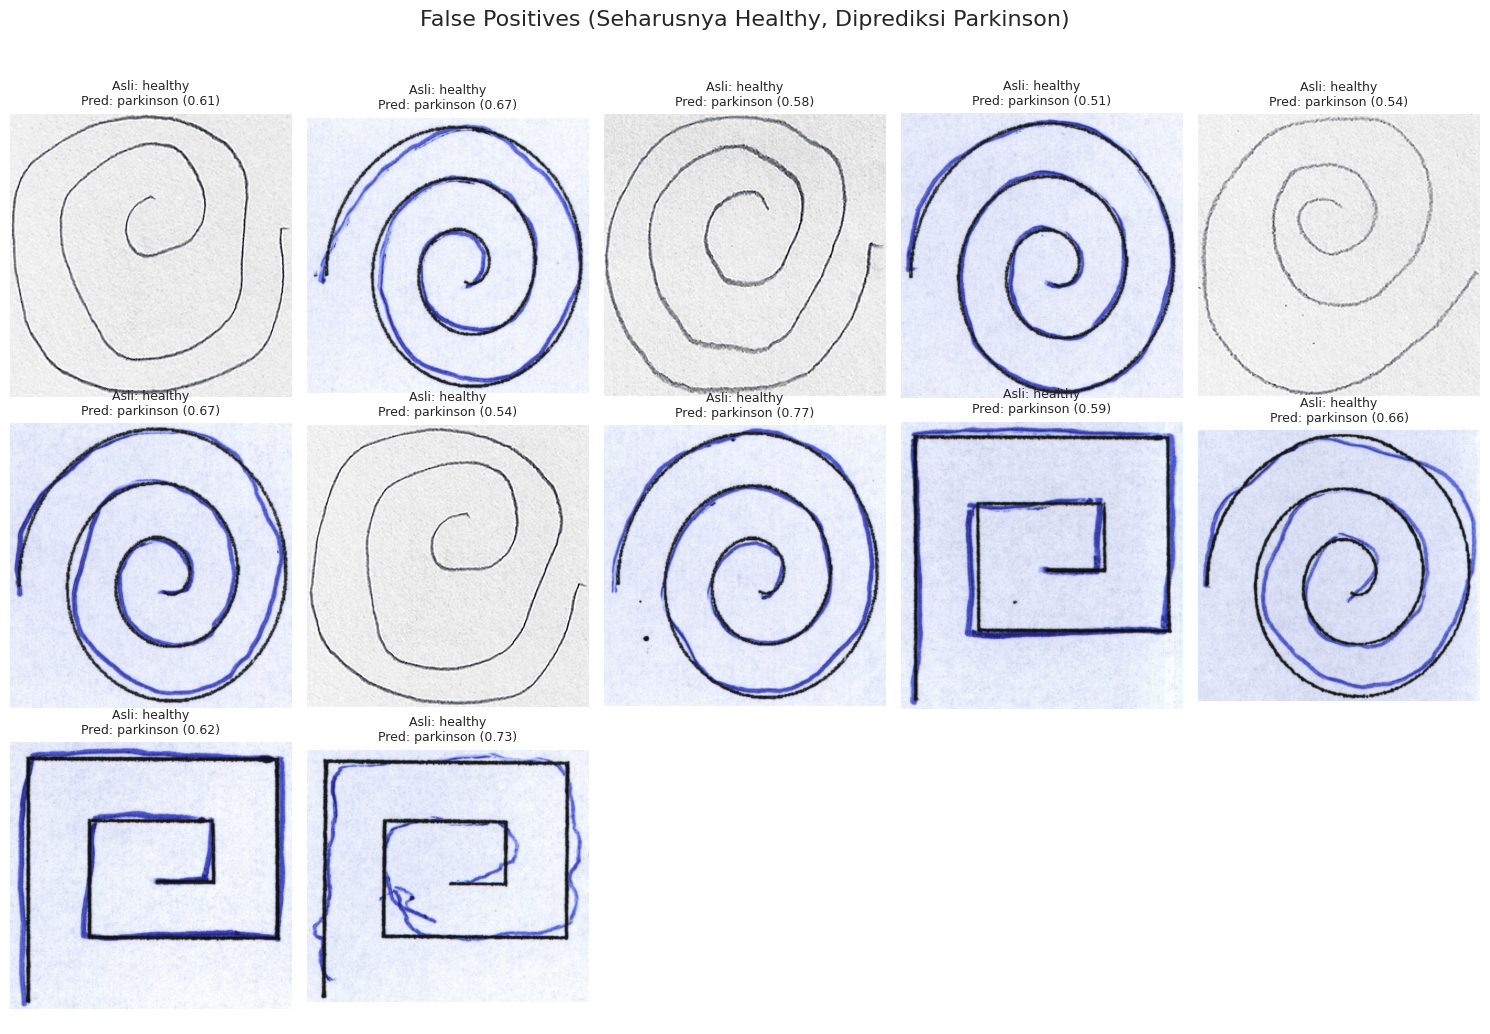


Menampilkan 3 dari 3 gambar false negatives (seharusnya parkinson, diprediksi healthy):


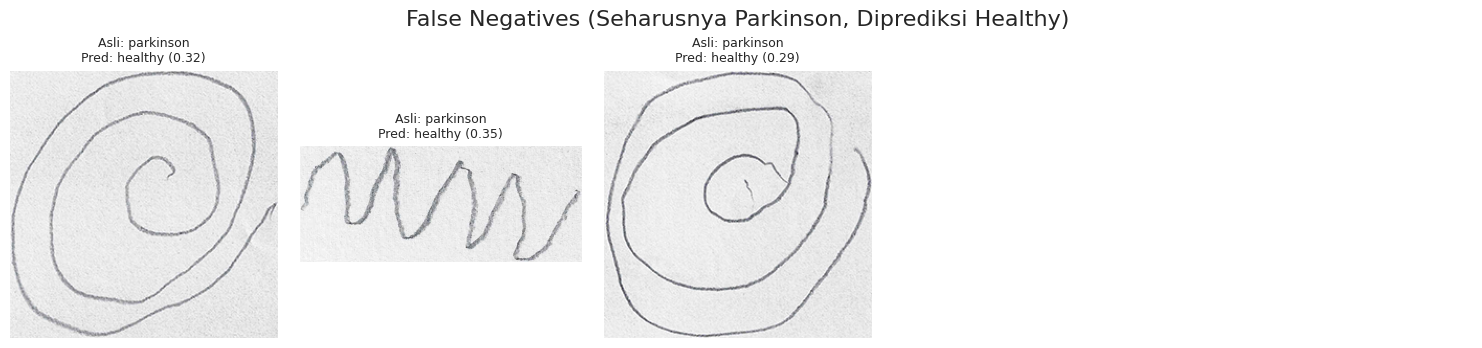


--- Analisis Manual Kesalahan ---


In [39]:
if model_for_analysis is not None and \
   'test_df' in locals() and not test_df.empty and \
   'class_names_from_tf' in locals() and \
   'IMG_SIZE' in locals():

    run_id_info = BEST_RUN_ID_FROM_MLFLOW if BEST_RUN_ID_FROM_MLFLOW else "Model Terakhir dari Loop Training"
    print(f"Melakukan analisis kesalahan dengan model dari Run ID/Sumber: {run_id_info}")

    all_image_paths_analysis = []
    all_true_labels_int_analysis = []
    all_predicted_labels_int_analysis = []
    all_predicted_probs_analysis = []

    for index, row in test_df.iterrows():
        img_path = row['path']
        actual_label_str = row['labels_main']
        try:
            img = image.load_img(img_path, target_size=IMG_SIZE)
            if img.mode != 'RGB':
                img = img.convert('RGB')
            img_array = image.img_to_array(img)
            img_array_expanded = np.expand_dims(img_array, axis=0)
            img_processed = tf.keras.applications.mobilenet_v2.preprocess_input(tf.cast(img_array_expanded, tf.float32))

            # Penyesuaian prediksi berdasarkan jenis model
            if is_pyfunc_model:
                # Model pyfunc (terutama yang bukan Keras murni) sering mengharapkan DataFrame
                # Namun, model Keras yang dibungkus MLflow pyfunc biasanya masih menerima array numpy
                try:
                    pred_output = model_for_analysis.predict(img_processed)
                except Exception as e_pyfunc_pred_np:
                    print(f"Gagal prediksi pyfunc dengan numpy array: {e_pyfunc_pred_np}. Mencoba dengan DataFrame (flattened)...")
                    # Jika input model pyfunc adalah flat array
                    df_input = pd.DataFrame(img_processed.reshape(1, -1))
                    pred_output = model_for_analysis.predict(df_input)

                # Interpretasi output pyfunc
                if isinstance(pred_output, dict):
                    # Ambil nilai dari key pertama (asumsi output tunggal)
                    pred_prob = pred_output[list(pred_output.keys())[0]]
                    if isinstance(pred_prob, (list, np.ndarray)): pred_prob = pred_prob[0]
                elif isinstance(pred_output, (list, np.ndarray)):
                    # Jika outputnya array/list, ambil elemen pertama (asumsi batch size 1)
                    pred_prob = pred_output[0]
                    if isinstance(pred_prob, (list, np.ndarray)): pred_prob = pred_prob[0] # Jika masih array (misal [[prob]])
                else:
                    pred_prob = pred_output # Jika outputnya skalar
            else: # Model Keras biasa
                pred_prob = model_for_analysis.predict(img_processed, verbose=0)[0][0]

            predicted_label_int = 1 if pred_prob > 0.5 else 0

            all_image_paths_analysis.append(img_path)
            all_true_labels_int_analysis.append(class_names_from_tf.index(actual_label_str))
            all_predicted_labels_int_analysis.append(predicted_label_int)
            all_predicted_probs_analysis.append(float(pred_prob)) # Pastikan float
        except Exception as e:
            print(f"Error memproses {img_path} untuk analisis kesalahan: {e}")

    # ... (Sisa kode analisis kesalahan seperti sebelumnya: identifikasi misclassified, FP, FN, display_misclassified_images) ...
    # (Pastikan fungsi display_misclassified_images dan panggilannya sudah benar)
    if not all_image_paths_analysis:
        print("Tidak ada gambar yang berhasil diproses untuk analisis kesalahan.")
    else:
        y_true_analysis_arr = np.array(all_true_labels_int_analysis)
        y_pred_analysis_arr = np.array(all_predicted_labels_int_analysis)

        misclassified_mask = (y_true_analysis_arr != y_pred_analysis_arr)
        if np.any(misclassified_mask):
            misclassified_paths = np.array(all_image_paths_analysis)[misclassified_mask]
            misclassified_true_labels_int = y_true_analysis_arr[misclassified_mask]
            misclassified_pred_probs = np.array(all_predicted_probs_analysis)[misclassified_mask]

            false_positives_paths = []
            false_negatives_paths = []
            fp_true_labels_str = []
            fp_pred_probs = []
            fn_true_labels_str = []
            fn_pred_probs = []

            healthy_idx = class_names_from_tf.index('healthy')
            parkinson_idx = class_names_from_tf.index('parkinson')

            for i in range(len(misclassified_paths)):
                true_label_int = misclassified_true_labels_int[i]
                img_path_err = misclassified_paths[i]
                pred_prob_err = misclassified_pred_probs[i]
                if true_label_int == healthy_idx and pred_prob_err > 0.5:
                    false_positives_paths.append(img_path_err)
                    fp_true_labels_str.append(class_names_from_tf[true_label_int])
                    fp_pred_probs.append(pred_prob_err)
                elif true_label_int == parkinson_idx and pred_prob_err <= 0.5:
                    false_negatives_paths.append(img_path_err)
                    fn_true_labels_str.append(class_names_from_tf[true_label_int])
                    fn_pred_probs.append(pred_prob_err)

            print(f"\nJumlah False Positives (Healthy -> Parkinson): {len(false_positives_paths)}")
            print(f"Jumlah False Negatives (Parkinson -> Healthy): {len(false_negatives_paths)}")

            def display_misclassified_images(image_paths_list_err, actual_labels_str_list_err, predicted_probs_list_err, title_prefix_err, class_names_map_list_err):
                # ... (isi fungsi display_misclassified_images sama seperti sebelumnya)
                num_images_err = len(image_paths_list_err)
                if num_images_err == 0: print(f"Tidak ada gambar {title_prefix_err.lower()} untuk ditampilkan."); return
                max_display_err = 15
                num_to_display_err = min(num_images_err, max_display_err)
                print(f"\nMenampilkan {num_to_display_err} dari {num_images_err} gambar {title_prefix_err.lower()}:")
                cols_err = 5
                rows_err = (num_to_display_err + cols_err - 1) // cols_err if cols_err > 0 else 0
                if rows_err == 0 and num_to_display_err > 0 : rows_err = 1
                if rows_err == 0: print(f"Tidak ada gambar valid untuk subplot {title_prefix_err.lower()}"); return
                fig_err, axes_err = plt.subplots(rows_err, cols_err, figsize=(cols_err * 3, rows_err * 3.5))
                if num_to_display_err == 1 and rows_err == 1 and cols_err == 1 : axes_err = np.array([axes_err])
                axes_err = axes_err.flatten()
                for i_err in range(num_to_display_err):
                    try:
                        img_err = Image.open(image_paths_list_err[i_err]).convert('RGB')
                        axes_err[i_err].imshow(img_err)
                        pred_label_idx_err = 1 if predicted_probs_list_err[i_err] > 0.5 else 0
                        pred_label_text_err = class_names_map_list_err[pred_label_idx_err]
                        axes_err[i_err].set_title(f"Asli: {actual_labels_str_list_err[i_err]}\nPred: {pred_label_text_err} ({predicted_probs_list_err[i_err]:.2f})", fontsize=9)
                        axes_err[i_err].axis('off')
                    except Exception as e:
                        axes_err[i_err].set_title(f"Error: {os.path.basename(image_paths_list_err[i_err])}", fontsize=8)
                        axes_err[i_err].axis('off'); print(f"Gagal menampilkan {image_paths_list_err[i_err]}: {e}")
                for j_err in range(num_to_display_err, len(axes_err)): axes_err[j_err].axis('off')
                fig_err.suptitle(title_prefix_err, fontsize=16)
                plt.tight_layout(rect=[0, 0, 1, 0.95]); plt.show()

            display_misclassified_images(false_positives_paths, fp_true_labels_str, fp_pred_probs,
                                         "False Positives (Seharusnya Healthy, Diprediksi Parkinson)", class_names_from_tf)
            display_misclassified_images(false_negatives_paths, fn_true_labels_str, fn_pred_probs,
                                         "False Negatives (Seharusnya Parkinson, Diprediksi Healthy)", class_names_from_tf)
            print("\n--- Analisis Manual Kesalahan ---") # Placeholder untuk observasi Anda
        else:
            print("Tidak ada kesalahan klasifikasi pada test set dengan model ini. Selamat!")
else:
    # ... (Pesan error jika variabel prasyarat tidak ada, sama seperti sebelumnya) ...
    if 'model_for_analysis' not in locals() or model_for_analysis is None: print("Variabel 'model_for_analysis' belum terdefinisi atau None.")
    if 'test_df' not in locals() or test_df.empty: print("DataFrame 'test_df' kosong atau belum terdefinisi.")
    if 'class_names_from_tf' not in locals(): print("Variabel 'class_names_from_tf' belum terdefinisi.")
    if 'IMG_SIZE' not in locals(): print("Variabel 'IMG_SIZE' belum terdefinisi.")

## Tahap 6: Fungsi Prediksi Gambar Tunggal (menggunakan model_for_analysis)

In [40]:
def predict_single_image(img_path, model_to_predict, class_names_map, is_pyfunc, target_size=(224, 224)):
    if model_to_predict is None:
        print("Model belum dilatih atau tidak tersedia untuk prediksi.")
        return None, None
    try:
        img = image.load_img(img_path, target_size=target_size)
        if img.mode != 'RGB': img = img.convert('RGB')
        img_array = image.img_to_array(img)
        img_array_expanded = np.expand_dims(img_array, axis=0)
        # Preprocessing spesifik MobileNetV2 tetap diperlukan sebelum ke model APAPUN (Keras atau Pyfunc Keras)
        img_processed_for_prediction = tf.keras.applications.mobilenet_v2.preprocess_input(tf.cast(img_array_expanded, tf.float32))

        # Penyesuaian prediksi berdasarkan jenis model
        if is_pyfunc:
            try:
                pred_output = model_to_predict.predict(img_processed_for_prediction)
            except Exception as e_pyfunc_pred_np_single:
                print(f"Gagal prediksi pyfunc dengan numpy array (single): {e_pyfunc_pred_np_single}. Mencoba dengan DataFrame (flattened)...")
                df_input = pd.DataFrame(img_processed_for_prediction.numpy().reshape(1, -1))
                pred_output = model_to_predict.predict(df_input)

            if isinstance(pred_output, dict):
                pred_prob_single = pred_output[list(pred_output.keys())[0]]
                if isinstance(pred_prob_single, (list, np.ndarray)): pred_prob_single = pred_prob_single[0]
            elif isinstance(pred_output, (list, np.ndarray)):
                pred_prob_single = pred_output[0]
                if isinstance(pred_prob_single, (list, np.ndarray)): pred_prob_single = pred_prob_single[0]
            else:
                pred_prob_single = pred_output
        else: # Model Keras biasa
            pred_prob_single = model_to_predict.predict(img_processed_for_prediction, verbose=0)[0][0]

        predicted_class_index = 1 if float(pred_prob_single) > 0.5 else 0
        label_pred_text = class_names_map[predicted_class_index] if predicted_class_index < len(class_names_map) else "Unknown"

        plt.figure(figsize=(4,4))
        plt.imshow(img); plt.axis('off'); plt.title(f"Prediksi: {label_pred_text} (Skor: {float(pred_prob_single):.2f})")
        plt.show()
        return label_pred_text, float(pred_prob_single)
    except FileNotFoundError: print(f"Error: File gambar tidak ditemukan di {img_path}"); return None, None
    except Exception as e: print(f"Error saat memprediksi gambar {img_path}: {e}"); return None, None


--- Contoh Prediksi pada Gambar Parkinson dari Test Set (Model Terbaik) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


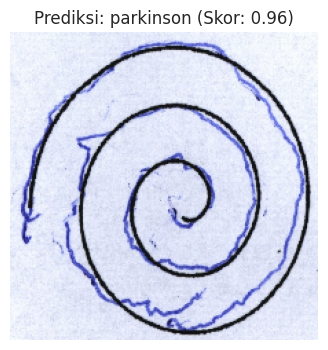


--- Contoh Prediksi pada Gambar Healthy dari Test Set (Model Terbaik) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


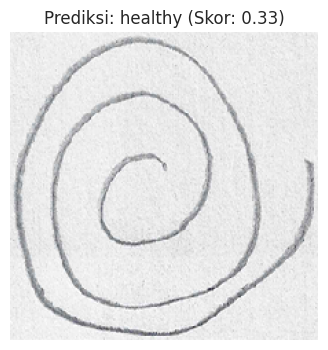

In [41]:
# Contoh Penggunaan (setelah loop training selesai)
if 'model_for_analysis' in locals() and model_for_analysis is not None and \
   'test_df' in locals() and not test_df.empty and \
   'class_names_from_tf' in locals():
    try:
        sample_parkinson_path = test_df[test_df['labels_main'] == 'parkinson']['path'].sample(1, random_state=SEED).iloc[0]
        print("\n--- Contoh Prediksi pada Gambar Parkinson dari Test Set (Model Terbaik) ---")
        if os.path.exists(sample_parkinson_path):
            predict_single_image(sample_parkinson_path, model_for_analysis, class_names_from_tf, is_pyfunc_model)
        else:
            print(f"File tidak ditemukan: {sample_parkinson_path}")
    except (ValueError, IndexError): print("Tidak ada sampel gambar Parkinson di test_df.")
    try:
        sample_healthy_path = test_df[test_df['labels_main'] == 'healthy']['path'].sample(1, random_state=SEED).iloc[0]
        print("\n--- Contoh Prediksi pada Gambar Healthy dari Test Set (Model Terbaik) ---")
        if os.path.exists(sample_healthy_path):
            predict_single_image(sample_healthy_path, model_for_analysis, class_names_from_tf, is_pyfunc_model)
        else:
            print(f"File tidak ditemukan: {sample_healthy_path}")
    except (ValueError, IndexError): print("Tidak ada sampel gambar Healthy di test_df.")
else:
    print("Model terbaik tidak tersedia atau DataFrame test_df kosong, tidak bisa melakukan contoh prediksi.")